In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [3]:

# create and connect to the sqlite database

database_db = sqlite3.connect("sales_data.db")
cursor = database_db.cursor()

In [19]:
# create the sales table

cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales(
      sale_id INTEGER PRIMARY KEY AUTOINCREMENT,
      product TEXT,
      brand TEXT,
      category TEXT,
      quantity INTEGER,
      price REAL,
      sale_date TEXT

    )
''')

database_db.commit()
print("New sales table created ")


New sales table created 


In [21]:
# Insert the sales data into the sales table
database_db = sqlite3.connect("sales_data.db")
cursor = database_db.cursor()

sales_data = [
    ('Milk', 'Amul', 'Dairy', 30, 28.00, '2025-04-01'),
    ('Butter', 'Amul', 'Dairy', 20, 45.00, '2025-04-02'),
    ('Mango Juice', 'Frooti', 'Beverages', 25, 20.00, '2025-04-01'),
    ('Cola', 'Pepsi', 'Beverages', 40, 35.00, '2025-04-03'),
    ('Chips', 'Lays', 'Snacks', 50, 20.00, '2025-04-02'),
    ('Cookies', 'Parle', 'Bakery', 35, 15.00, '2025-04-03'),
    ('Biscuits', 'Britannia', 'Bakery', 40, 18.00, '2025-04-01'),
    ('Cheese', 'Amul', 'Dairy', 15, 55.00, '2025-04-04')
]

cursor.executemany('''
    INSERT INTO sales (product, brand, category, quantity, price, sale_date)
    VALUES (?, ?, ?, ?, ?, ?)
''', sales_data)


database_db.commit()
database_db.close()

print("Data inserted successfully into sales table!")

Data inserted successfully into sales table!


In [11]:
database_db = sqlite3.connect("sales_data.db")

df = pd.read_sql_query("SELECT * FROM sales", database_db)
print(df)
database_db.close()

   sale_id      product      brand   category  quantity  price   sale_date
0        1         Milk       Amul      Dairy        30   28.0  2025-04-01
1        2       Butter       Amul      Dairy        20   45.0  2025-04-02
2        3  Mango Juice     Frooti  Beverages        25   20.0  2025-04-01
3        4         Cola      Pepsi  Beverages        40   35.0  2025-04-03
4        5        Chips       Lays     Snacks        50   20.0  2025-04-02
5        6      Cookies      Parle     Bakery        35   15.0  2025-04-03
6        7     Biscuits  Britannia     Bakery        40   18.0  2025-04-01
7        8       Cheese       Amul      Dairy        15   55.0  2025-04-04


In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# calculate total quantity and total revenue per product

database_db = sqlite3.connect("sales_data.db")

query = """
SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Run query and load result into pandas DataFrame
df = pd.read_sql_query(query, database_db)

print("Sales Summary:\n")
print(df)

database_db.close()


Sales Summary:

       product  total_qty  revenue
0     Biscuits         40    720.0
1       Butter         20    900.0
2       Cheese         15    825.0
3        Chips         50   1000.0
4         Cola         40   1400.0
5      Cookies         35    525.0
6  Mango Juice         25    500.0
7         Milk         30    840.0


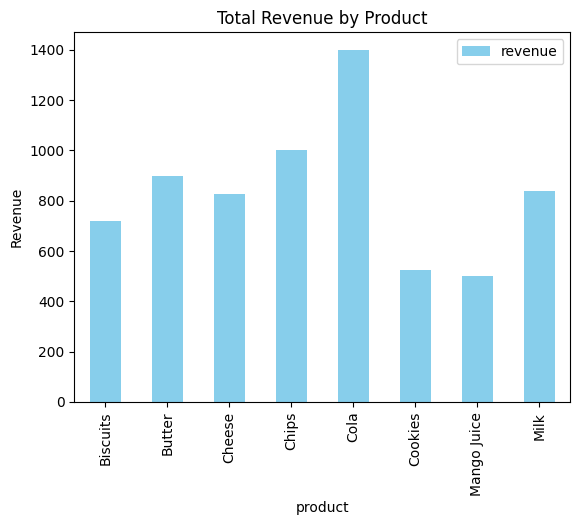

In [23]:
# create a bar chart of total revenue per product.

df.plot(kind='bar',
        x='product',
        y='revenue',
        title='Total Revenue by Product',
        color='skyblue')
plt.ylabel('Revenue')

plt.savefig("sales_chart.png")


plt.show()

sales by Category:
   product  total_qty  revenue
0  Butter         40   1800.0
1  Cheese         30   1650.0
2    Milk         60   1680.0


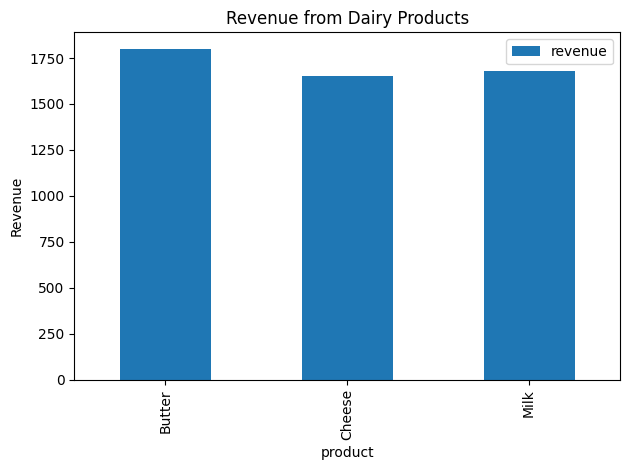

In [27]:
database_db = sqlite3.connect("sales_data.db")

category = 'Dairy'

query_category = f"""
SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue
FROM sales
WHERE category = '{category}'
GROUP BY product;
"""

df_category = pd.read_sql_query(query_category, database_db)
print("sales by Category:\n", df_category)

df_category.plot(kind='bar', x='product', y='revenue', title=f"Revenue from {category} Products")


import matplotlib.pyplot as plt
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig(f"{category.lower()}_sales_chart.png")
plt.show()

database_db.close()

In [22]:
from google.colab import files
files.download("sales_data.db")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>